In [18]:
#The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.
#Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
train=pd.read_csv("E:/Machine Learning Projects/Bigmart Sales Data Set/Train.csv")
test=pd.read_csv("E:/Machine Learning Projects/Bigmart Sales Data Set/Test.csv")
train.head(10)
test.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
5,FDH56,9.800,Regular,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,Small,Tier 1,Supermarket Type1
6,FDL48,19.350,Regular,0.082602,Baking Goods,50.1034,OUT018,2009,Medium,Tier 3,Supermarket Type2
7,FDC48,NaN,Low Fat,0.015782,Baking Goods,81.0592,OUT027,1985,Medium,Tier 3,Supermarket Type3
8,FDN33,6.305,Regular,0.123365,Snack Foods,95.7436,OUT045,2002,NaN,Tier 2,Supermarket Type1
9,FDA36,5.985,Low Fat,0.005698,Baking Goods,186.8924,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [20]:
#Its generally a good idea to combine both train and test data sets into one, perform feature engineering and then divide them later again. This saves the trouble of performing the same steps twice on test and train. 
#Lets combine them into a dataframe ‘data’ with a ‘source’ column specifying where each observation belongs.
train['source']='train' #Add an extra column 'source' to identify the train or test  
test['source']='test'
train.head(10)
data=pd.concat([train,test],ignore_index=True)
data.head(10)

c:\users\santanu\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.300,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.920,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.500,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.200,1998,OUT010,Tier 3,NaN,Grocery Store,train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.930,1987,OUT013,Tier 3,High,Supermarket Type1,train
5,Regular,FDP36,51.4008,556.6088,Baking Goods,0.000000,10.395,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
6,Regular,FDO10,57.6588,343.5528,Snack Foods,0.012741,13.650,1987,OUT013,Tier 3,High,Supermarket Type1,train
7,Low Fat,FDP10,107.7622,4022.7636,Snack Foods,0.127470,NaN,1985,OUT027,Tier 3,Medium,Supermarket Type3,train
8,Regular,FDH17,96.9726,1076.5986,Frozen Foods,0.016687,16.200,2002,OUT045,Tier 2,NaN,Supermarket Type1,train
9,Regular,FDU28,187.8214,4710.5350,Frozen Foods,0.094450,19.200,2007,OUT017,Tier 2,NaN,Supermarket Type1,train


In [21]:
data.isna().sum() #Find missing values

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

In [22]:
#Note that the Item_Outlet_Sales is the target variable and missing values are ones in the test set. 
#So we need not worry about it. But we’ll impute the missing values in Item_Weight and Outlet_Size in the data cleaning section.
data.apply(lambda x:len(x.unique())) #Shows no. of unique items in each columns

Item_Fat_Content                 5
Item_Identifier               1559
Item_MRP                      8052
Item_Outlet_Sales             3494
Item_Type                       16
Item_Visibility              13006
Item_Weight                    416
Outlet_Establishment_Year        9
Outlet_Identifier               10
Outlet_Location_Type             3
Outlet_Size                      4
Outlet_Type                      4
source                           2
dtype: int64

In [23]:
data1=data.drop(['Item_Identifier','Outlet_Identifier','source'],axis=1) #Exclude those columns
for col in data1: #Count the sum of each item based on each column
    print (data[col].value_counts())

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
172.0422    8
179.7660    7
127.1020    7
177.9370    7
123.1046    7
166.0526    7
196.5768    7
178.4370    7
175.0370    7
182.1608    7
188.1872    7
110.1544    7
178.2370    7
177.0370    7
113.2834    7
113.1544    7
50.3692     6
152.8366    6
142.0154    6
125.2678    6
119.8124    6
97.0094     6
101.7990    6
100.1016    6
144.6102    6
154.4630    6
140.6154    6
121.3098    6
177.6370    6
194.7110    6
           ..
177.7660    1
151.5708    1
248.5092    1
36.2874     1
85.2908     1
41.9112     1
181.9318    1
149.4392    1
107.5938    1
213.2218    1
244.7460    1
234.0642    1
98.1068     1
228.7352    1
48.3060     1
258.6304    1
251.5382    1
121.7440    1
85.4540     1
127.6362    1
49.2692     1
237.9880    1
236.9932    1
178.4686    1
233.6616    1
176.9712    1
253.6014    1
118.4808    1
230.8010    1
192.0188    1
Name: Item_MRP, Length: 8052,

In [24]:
#Data Cleaning
#Remove missing value of Item_Weight and replace by its mean
#Determine the average weight per item:
item_avg_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier')

#Get a boolean variable specifying missing Item_Weight values
miss_bool = data['Item_Weight'].isnull() 

#Impute data and check #missing values before and after imputation to confirm
print ('Orignal #missing: %d'% sum(miss_bool))
data.loc[miss_bool,'Item_Weight'] = data.loc[miss_bool,'Item_Identifier'].apply(lambda x: item_avg_weight.loc[x])
print ('Final #missing: %d'% sum(data['Item_Weight'].isnull()))

Orignal #missing: 2439
Final #missing: 0


In [25]:
#Remove missing value of Outlet_Size and replace by its mode because here the values are in non numerical so we choose the most frequent item to replace the NaN
#Determing the mode for each
from scipy.stats import mode
outlet_size_mode = data.pivot_table(values='Outlet_Size', index='Outlet_Type',aggfunc=(lambda x: x.value_counts().idxmax()))
print ('Mode for each Outlet_Type:')
print (outlet_size_mode)
#Get a boolean variable specifying missing Item_Weight values
miss_bool = data['Outlet_Size'].isnull() 

#Impute data and check #missing values before and after imputation to confirm
print ('\nOrignal #missing: %d'% sum(miss_bool))
data.loc[miss_bool,'Outlet_Size'] = data.loc[miss_bool,'Outlet_Type'].apply(lambda x: outlet_size_mode.loc[x])
print (sum(data['Outlet_Size'].isnull()))
data['Outlet_Size'].describe()

Mode for each Outlet_Type:
                  Outlet_Size
Outlet_Type                  
Grocery Store           Small
Supermarket Type1       Small
Supermarket Type2      Medium
Supermarket Type3      Medium

Orignal #missing: 4016
0


count     14204
unique        3
top       Small
freq       7996
Name: Outlet_Size, dtype: object

In [26]:
#Feature Engineering
#Step 1: Consider combining Outlet_Type 
data.pivot_table(values='Item_Outlet_Sales',index='Outlet_Type')
visibility_avg = data.pivot_table(values='Item_Visibility', index='Item_Identifier') #Item wise visibility average
#Step 2: Modify Item_Visibility
#We noticed that the minimum value here is 0, which makes no practical sense. Lets consider it like missing information and impute it with mean visibility of that product.

miss_bool = (data['Item_Visibility'] == 0) # Find the locations where 0 is situated

print ('Number of 0 values initially: %d'%sum(miss_bool))

#Here we place the avg value of each item wise instead of 0
data.loc[miss_bool,'Item_Visibility'] = data.loc[miss_bool,'Item_Identifier'].apply(lambda x: visibility_avg.loc[x])
print("After replacing :",sum(data['Item_Visibility'] == 0))

Number of 0 values initially: 879
After replacing : 0


In [27]:
#Determine another variable with means ratio, we should look at the visibility of the product in that particular store as compared to the mean visibility of that product across all stores. This will give some idea about how much importance was given to that product in a store as compared to other stores.
data['Item_Visibility_MeanRatio'] = data.apply(lambda x: x['Item_Visibility']/visibility_avg.loc[x['Item_Identifier']], axis=1)
print (data['Item_Visibility_MeanRatio'].describe())
#Step 3: Create a broad category of Type of Item
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
print(data['Item_Type_Combined'].value_counts())

count    14204.000000
mean         1.061884
std          0.235907
min          0.844563
25%          0.925131
50%          0.999070
75%          1.042007
max          3.010094
Name: Item_Visibility_MeanRatio, dtype: float64
Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64


In [28]:
#Step 4: Determine the years of operation of a store
data['Outlet_Years']=2013-data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()
#This shows stores which are 4-28 years old. Notice I’ve used 2013. Why? Read the problem statement carefully and you’ll know.

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

In [29]:
#Step 5: Modify categories of Item_Fat_Content
data['Item_Fat_Content']=data['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
print (data['Item_Fat_Content'].value_counts())

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


In [30]:
#In step 6 we saw there were some non-consumables as well and a fat-content should not be specified for them. 
#So we can also create a separate category for such kind of observations.
data.loc[data['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content']="Non-Edible" #put "Non-Edible" on location of 'Item_Type_Combined' where food is non consumable 
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [31]:
#Since scikit-learn accepts only numerical variables,so we have to convert necessary columns into numeric values.
#Also, I wanted Outlet_Identifier as a variable as well. So I created a new variable ‘Outlet’ same as Outlet_Identifier and coded that. Outlet_Identifier should remain as it is, because it will be required in the submission file.
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Outlet']=le.fit_transform(data['Outlet_Identifier']) #New 'Outlet' column will be assigned by the unique number of each outlet
var= ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet'] #Here we include those column(not all only for model buliding) which are non numeric 
le=LabelEncoder()
for i in var:
    data[i]=le.fit_transform(data[i]) #Var contained columns will be assigned by the unique number instead of the string

In [32]:
#One-Hot-Coding refers to creating dummy variables, one for each category of a categorical variable. For example, the Item_Fat_Content has 3 categories – ‘Low Fat’, ‘Regular’ and ‘Non-Edible’. One hot coding will remove this variable and generate 3 new variables. Each will have binary numbers – 0 (if the category is not present) and 1(if category is present). This can be done using ‘get_dummies’ function of Pandas.
#One-Hot|-Coding
data=pd.get_dummies(data,columns=var) #Each var contained column's numeric data are replaced by another new column which contianed 0 or 1 beacuse scilit learn models are only takes 0 or 1.
#You can notice that each row will have only one of the columns as 1 corresponding to the category in the original variable.

In [33]:
data.dtypes

Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
source                        object
Item_Visibility_MeanRatio    float64
Outlet_Years                   int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
O

In [34]:
#Drop the columns which have been converted to different types:
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

In [35]:
data

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Identifier,source,Item_Visibility_MeanRatio,Outlet_Years,Item_Fat_Content_0,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,249.8092,3735.1380,0.016047,9.300,OUT049,train,0.931078,14,1,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,48.2692,443.4228,0.019278,5.920,OUT018,train,0.933420,4,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,141.6180,2097.2700,0.016760,17.500,OUT049,train,0.960069,14,1,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,182.0950,732.3800,0.017834,19.200,OUT010,train,1.000000,15,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,53.8614,994.7052,0.009780,8.930,OUT013,train,1.000000,26,0,...,0,1,0,0,0,0,0,0,0,0
5,FDP36,51.4008,556.6088,0.057059,10.395,OUT018,train,1.000000,4,0,...,0,0,0,1,0,0,0,0,0,0
6,FDO10,57.6588,343.5528,0.012741,13.650,OUT013,train,1.497197,26,0,...,0,1,0,0,0,0,0,0,0,0
7,FDP10,107.7622,4022.7636,0.127470,19.000,OUT027,train,0.870493,28,1,...,0,0,0,0,0,1,0,0,0,0
8,FDH17,96.9726,1076.5986,0.016687,16.200,OUT045,train,0.924160,11,0,...,0,0,0,0,0,0,0,1,0,0
9,FDU28,187.8214,4710.5350,0.094450,19.200,OUT017,train,0.963983,6,0,...,0,0,1,0,0,0,0,0,0,0


In [36]:
#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv("E:/Machine Learning Projects/Bigmart Sales Data Set/train_modified.csv",index=False)
test.to_csv("E:/Machine Learning Projects/Bigmart Sales Data Set/test_modified.csv",index=False)


c:\users\santanu\appdata\local\programs\python\python36\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [37]:
#Model building
train_df = pd.read_csv("E:/Machine Learning Projects/Bigmart Sales Data Set/train_modified.csv")
test_df = pd.read_csv("E:/Machine Learning Projects/Bigmart Sales Data Set/test_modified.csv")

In [38]:
#Model function
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,r2_score
def ModelFit(model,predictors,target,filename):
    #Fit the model
    model.fit(train[predictors],train[target])
    #Predict training set
    pred_train=model.predict(train[predictors])
    #Calculate the cross validation score of the model
    cv_score=cross_val_score(model,train[predictors],train[target],cv=20, scoring='neg_mean_squared_error')
    print (cv_score)
    cv_score = np.sqrt(np.abs(cv_score))
    print (cv_score) 
    #Print model report:
    print ("\nModel Report")
    print ("R square score : ",r2_score(train[target].values,pred_train)*100)
    #R square score defines how well your model is fitting to the data But if you want to make predictions with your model, then R2 doesn't tell you much about the accuracy of the predictions.
    print ("RMSE (Error): %.4g" % np.sqrt(mean_squared_error(train[target].values,pred_train)))
    print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    #Compare RMSE (Error) and CV score...RMSE usually gives you how distant your model is from giving the right answer. Lower RMSE (Error) is good. 
    #Cross validation means checking the prediction on which data(unseen) that have not trained. Higher cv score(mean) is good.
    #If the RMSE is low but the cv is high then the model suffers from overfit.
    

    
    #Predict on testing data:
    test[target]=model.predict(test[predictors])
    #Export submission file:
    test[['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']].to_csv(filename, index=False)
    

[-1471330.11148314 -1239340.97777811 -1289914.62710808 -1313546.67865591
 -1297826.5949663  -1220567.23680244 -1175261.83703611 -1291932.81538949
 -1278918.37224047 -1228063.6283892  -1176914.30901168 -1289207.15653739
 -1323555.44851434 -1152253.69349619 -1160705.31091598 -1411374.23419648
 -1424309.20571589 -1165562.40992156 -1464712.3747745  -1163013.68354143]
[1212.98397    1113.25692353 1135.74408522 1146.10064072 1139.22192525
 1104.79284791 1084.09493912 1136.63222521 1130.89273242 1108.18032305
 1084.85681498 1135.43258564 1150.45879914 1073.43080517 1077.36034404
 1188.01272476 1193.44426167 1079.61215718 1210.25302097 1078.43112137]

Model Report
R square score :  56.315469023026886
RMSE (Error): 1128
CV Score : Mean - 1129 | Std - 43.75 | Min - 1073 | Max - 1213
[ 1.55557482e+01 -1.42748766e+01 -2.99689387e-01  1.64020838e+02
  3.42040651e+14  5.27017402e+15 -1.78432193e+16  5.27017402e+15
  9.06440321e+14 -1.38725379e+16 -5.53028377e+15 -8.28998585e+15
  1.11326039e+16 -1.2

c:\users\santanu\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


If you notice the coefficients, they are very large in magnitude which signifies overfitting. To cater to this, lets use a ridge regression model.


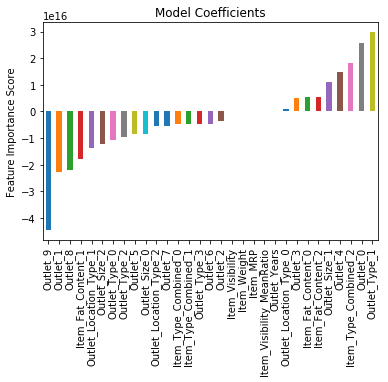

In [39]:
#Linear model
from sklearn.linear_model import LinearRegression
algo1 = LinearRegression(normalize=True)
predictors=['Item_MRP', 'Item_Visibility', 'Item_Weight', 'Item_Visibility_MeanRatio', 'Outlet_Years', 'Item_Fat_Content_0', 'Item_Fat_Content_1', 'Item_Fat_Content_2', 'Outlet_Location_Type_0', 'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Size_0', 'Outlet_Size_1', 'Outlet_Size_2', 'Outlet_Type_0', 'Outlet_Type_1', 'Outlet_Type_2', 'Outlet_Type_3', 'Item_Type_Combined_0', 'Item_Type_Combined_1', 'Item_Type_Combined_2', 'Outlet_0', 'Outlet_1', 'Outlet_2', 'Outlet_3', 'Outlet_4', 'Outlet_5', 'Outlet_6', 'Outlet_7', 'Outlet_8', 'Outlet_9']
target='Item_Outlet_Sales'
ModelFit(algo1,predictors,target,"E:/Machine Learning Projects/Bigmart Sales Data Set/lin.csv")
print(algo1.coef_)
print (algo1.coef_.reshape(-1))
coef1 = pd.Series(algo1.coef_.reshape(-1), predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')
plt.ylabel('Feature Importance Score')
print ("If you notice the coefficients, they are very large in magnitude which signifies overfitting. To cater to this, lets use a ridge regression model.")
#plt.plot(col,algo1.coef_,"r") 
#plt.plot(col,algo1.coef_,">") #The curve shows high overfitting which means not a good model

[-1480525.1456144  -1244370.28062235 -1300296.4197402  -1318961.55216972
 -1298268.77628944 -1223256.94149058 -1168141.49352593 -1292971.62207586
 -1268820.05572738 -1211745.81081975 -1184835.54940319 -1278701.47668601
 -1335404.96267473 -1157779.95760676 -1171596.93497911 -1419280.50372394
 -1432360.64002403 -1165411.40151871 -1462810.40504632 -1156901.15969978]
[1216.76832044 1115.51346053 1140.30540635 1148.46051398 1139.41598036
 1106.00946718 1080.80594629 1137.08910032 1126.41912969 1100.79326434
 1088.50151557 1130.79683263 1155.59723203 1076.00183904 1082.40331438
 1191.3355966  1196.81270048 1079.5422185  1209.46699213 1075.59339887]

Model Report
R square score :  56.25404650408207
RMSE (Error): 1129
CV Score : Mean - 1130 | Std - 44.6 | Min - 1076 | Max - 1217
[[ 1.48092359e+01 -2.72632195e+02  1.59405262e-01 -8.53801865e+01
   3.80508257e+00 -1.47668196e+01 -1.45552436e+01  2.57823275e+01
  -1.13544031e+02  1.09775614e+02 -5.23887419e+00 -2.96540976e+01
   2.00037150e+02 -1

c:\users\santanu\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\santanu\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s



Though the regression coefficient look better now, the score is about the same. You can tune the parameters of the model for slightly better results but I don’t think there will be a significant improvement. Even the cross-validation score is same so we can’t expect way better performance.


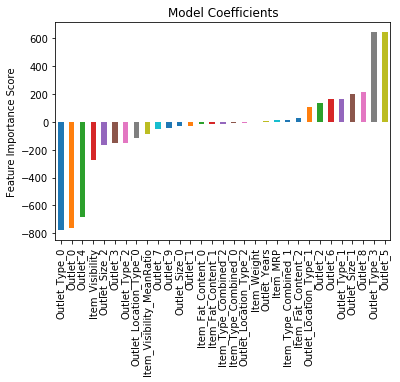

In [40]:
#Ridge model
from sklearn.linear_model import Ridge
algo2 = Ridge(alpha=0.05,normalize=True)
predictors=['Item_MRP', 'Item_Visibility', 'Item_Weight', 'Item_Visibility_MeanRatio', 'Outlet_Years', 'Item_Fat_Content_0', 'Item_Fat_Content_1', 'Item_Fat_Content_2', 'Outlet_Location_Type_0', 'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Size_0', 'Outlet_Size_1', 'Outlet_Size_2', 'Outlet_Type_0', 'Outlet_Type_1', 'Outlet_Type_2', 'Outlet_Type_3', 'Item_Type_Combined_0', 'Item_Type_Combined_1', 'Item_Type_Combined_2', 'Outlet_0', 'Outlet_1', 'Outlet_2', 'Outlet_3', 'Outlet_4', 'Outlet_5', 'Outlet_6', 'Outlet_7', 'Outlet_8', 'Outlet_9']
target=['Item_Outlet_Sales']
ModelFit(algo2,predictors,target,"E:/Machine Learning Projects/Bigmart Sales Data Set/rig.csv")
print(algo2.coef_)
print (algo2.coef_.reshape(-1))
coef1 = pd.Series(algo2.coef_.reshape(-1), predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')
plt.ylabel('Feature Importance Score')
print("\nThough the regression coefficient look better now, the score is about the same. You can tune the parameters of the model for slightly better results but I don’t think there will be a significant improvement. Even the cross-validation score is same so we can’t expect way better performance.")

[-1407570.72106783 -1119423.85394726 -1214402.86199402 -1232574.8216216
 -1254768.19771654 -1196180.59305007 -1118270.50344333 -1181566.87876331
 -1244754.0477868  -1209557.80352683 -1005597.97266989 -1211841.84200386
 -1209138.57742729 -1072026.21152435 -1066803.88554534 -1324758.92879977
 -1252086.15965252 -1055985.7912773  -1344204.56665772 -1147054.66972447]
[1186.41085677 1058.02828599 1101.99948366 1110.21386301 1120.16436192
 1093.70041284 1057.48309842 1086.99902427 1115.68546096 1099.79898324
 1002.7950801  1100.83688256 1099.60837457 1035.38698636 1032.86198766
 1150.98172392 1118.96655877 1027.61169285 1159.39836409 1071.00638174]

Model Report
R square score :  61.579922639160365
RMSE (Error): 1058
CV Score : Mean - 1091 | Std - 45.42 | Min - 1003 | Max - 1186
[5.41849576e-01 3.91091658e-03 2.23821097e-03 4.32598508e-03
 1.03437642e-01 1.09862126e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 5.28367333e-04 0.00000000e+00
 1.18364930e-04 9.09159063e-05 3.1

c:\users\santanu\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\santanu\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Here we can see that the RMSE is 1058 and the mean CV error is 1091. This tells us that the model is slightly overfitting. Lets try making a decision tree with just top 4 variables, a max_depth of 8 and min_samples_leaf as 150.


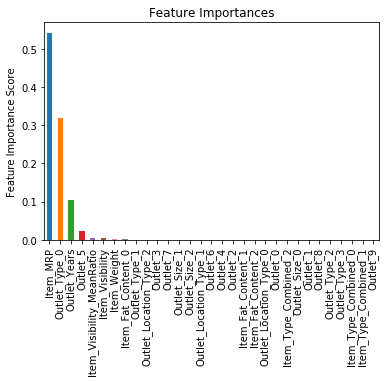

In [41]:
from sklearn.tree import DecisionTreeRegressor
algo3 = DecisionTreeRegressor(max_depth=15,min_samples_leaf=100)
predictors=['Item_MRP', 'Item_Visibility', 'Item_Weight', 'Item_Visibility_MeanRatio', 'Outlet_Years', 'Item_Fat_Content_0', 'Item_Fat_Content_1', 'Item_Fat_Content_2', 'Outlet_Location_Type_0', 'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Size_0', 'Outlet_Size_1', 'Outlet_Size_2', 'Outlet_Type_0', 'Outlet_Type_1', 'Outlet_Type_2', 'Outlet_Type_3', 'Item_Type_Combined_0', 'Item_Type_Combined_1', 'Item_Type_Combined_2', 'Outlet_0', 'Outlet_1', 'Outlet_2', 'Outlet_3', 'Outlet_4', 'Outlet_5', 'Outlet_6', 'Outlet_7', 'Outlet_8', 'Outlet_9']
target=['Item_Outlet_Sales']
ModelFit(algo3,predictors,target,"E:/Machine Learning Projects/Bigmart Sales Data Set/dec.csv")
print(algo3.feature_importances_)
coef1 = pd.Series(algo3.feature_importances_.reshape(-1),predictors).sort_values(ascending=False)
coef1.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
print("Here we can see that the RMSE is 1058 and the mean CV error is 1091. This tells us that the model is slightly overfitting. Lets try making a decision tree with just top 4 variables, a max_depth of 8 and min_samples_leaf as 150.")

[-1372417.47623772 -1112153.52750034 -1281800.59709158 -1214855.15105608
 -1232038.23014748 -1198859.32224902 -1122982.16769444 -1179281.64339625
 -1254976.19949872 -1211992.68088039 -1058348.61213203 -1234005.55320646
 -1237884.3450344  -1055435.72811798 -1089563.99557773 -1309679.61165792
 -1303697.08520552 -1068896.46989893 -1367660.84243689 -1159963.1809924 ]
[1171.50223057 1054.58689898 1132.16632925 1102.20467748 1109.97217539
 1094.92434545 1059.70852959 1085.94734835 1120.25720239 1100.90539143
 1028.76071665 1110.85802567 1112.6025099  1027.34401644 1043.82182176
 1144.41234337 1141.79555316 1033.87449427 1169.47032559 1077.0158685 ]

Model Report
R square score :  60.58974644993484
RMSE (Error): 1071
CV Score : Mean - 1096 | Std - 43.3 | Min - 1027 | Max - 1172
[0.54850835 0.32359825 0.02726698 0.10062643]


c:\users\santanu\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\santanu\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Text(0, 0.5, 'Feature Importance Score')

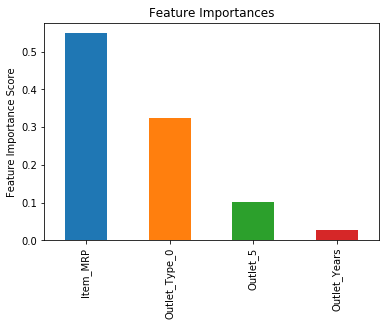

In [42]:
from sklearn.tree import DecisionTreeRegressor
algo3_1 = DecisionTreeRegressor(max_depth=8,min_samples_leaf=150)
predictors=['Item_MRP', 'Outlet_Type_0' ,'Outlet_Years', 'Outlet_5']
target=['Item_Outlet_Sales']
ModelFit(algo3_1,predictors,target,"E:/Machine Learning Projects/Bigmart Sales Data Set/dec1.csv")
print(algo3_1.feature_importances_)
coef1 = pd.Series(algo3_1.feature_importances_.reshape(-1),predictors).sort_values(ascending=False)
coef1.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

[-1370645.44657555 -1142935.61734284 -1303296.40466201 -1254996.80063489
 -1272753.35008176 -1205266.3543024  -1084562.68395153 -1222887.84150614
 -1248605.51162264 -1154513.05354159 -1113246.25937876 -1324872.5366688
 -1288979.85180644 -1056405.89677253 -1111841.65028287 -1361492.75572883
 -1334783.23654918 -1072571.13175067 -1385930.54957039 -1138435.23369947]
[1170.74567972 1069.0816701  1141.62007895 1120.26639717 1128.16370713
 1097.84623436 1041.42339322 1105.84259346 1117.41018056 1074.48269113
 1055.10485705 1151.03107546 1135.33248514 1027.8160812  1054.4390216
 1166.83021718 1155.3281943  1035.65010102 1177.25551584 1066.97480462]

Model Report
R square score :  58.67541185218816
RMSE (Error): 1097
CV Score : Mean - 1105 | Std - 47.31 | Min - 1028 | Max - 1177
[0.54210906 0.33415591 0.0233074  0.10042763]


c:\users\santanu\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\santanu\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Text(0, 0.5, 'Feature Importance Score')

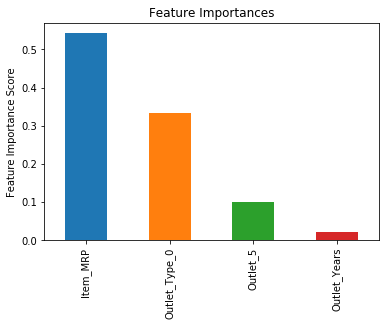

In [43]:
from sklearn.tree import DecisionTreeRegressor
algo3_2 = DecisionTreeRegressor(min_samples_split=1000,max_depth=8,min_samples_leaf=250,random_state=10)
predictors=['Item_MRP', 'Outlet_Type_0' ,'Outlet_Years', 'Outlet_5']
target=['Item_Outlet_Sales']
ModelFit(algo3_2,predictors,target,"E:/Machine Learning Projects/Bigmart Sales Data Set/dec2.csv")
print(algo3_2.feature_importances_)
coef1 = pd.Series(algo3_2.feature_importances_.reshape(-1),predictors).sort_values(ascending=False)
coef1.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

c:\users\santanu\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
c:\users\santanu\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\santanu\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\santanu\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_va

[-1351081.7492254  -1100156.75412291 -1226233.01932963 -1212808.85993776
 -1225619.08673724 -1161071.07429864 -1073018.24008104 -1155837.85898615
 -1200060.39717083 -1152808.20248332 -1079821.69785891 -1237280.60766407
 -1159890.61305908 -1043730.08804568 -1041734.94392511 -1317298.006595
 -1274714.4411731  -1043865.38602035 -1341841.89169113 -1130688.13404878]
[1162.36042139 1048.8835751  1107.35406232 1101.27601442 1107.07682061
 1077.53008046 1035.86593731 1075.09899962 1095.47268207 1073.68906229
 1039.14469534 1112.33115917 1076.98217862 1021.63109195 1020.6541745
 1147.73603524 1129.03252441 1021.69730646 1158.37899312 1063.33820304]

Model Report
R square score :  60.452626137878276
RMSE (Error): 1073
CV Score : Mean - 1084 | Std - 43.66 | Min - 1021 | Max - 1162


c:\users\santanu\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\santanu\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


[5.51021325e-01 1.85923190e-04 6.04463257e-05 1.84389603e-04
 4.64090465e-02 1.21638492e-06 1.55052848e-05 0.00000000e+00
 1.01994238e-06 2.02129201e-05 4.35591096e-07 0.00000000e+00
 9.84649189e-05 0.00000000e+00 3.24803872e-01 5.32822534e-04
 1.96963665e-04 3.58459780e-02 0.00000000e+00 1.58691197e-05
 2.45813384e-05 9.88521719e-08 0.00000000e+00 2.17542656e-05
 1.46520695e-04 9.10953960e-07 4.04014967e-02 1.11467190e-05
 0.00000000e+00 0.00000000e+00 0.00000000e+00]
We might feel this is a very small improvement but as our model gets better, achieving even minute improvements becomes exponentially difficult. Lets try another random forest with max_depth of 6 and 400 trees. Increasing the number of trees makes the model robust but is computationally expensive.


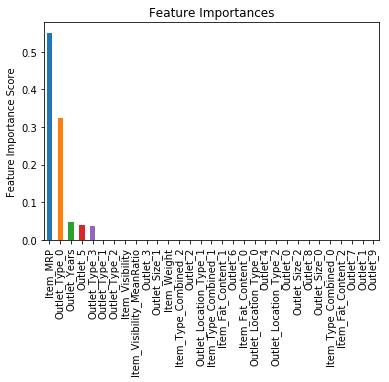

In [44]:
from sklearn.ensemble import RandomForestRegressor
algo4 = RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4)
predictors=['Item_MRP', 'Item_Visibility', 'Item_Weight', 'Item_Visibility_MeanRatio', 'Outlet_Years', 'Item_Fat_Content_0', 'Item_Fat_Content_1', 'Item_Fat_Content_2', 'Outlet_Location_Type_0', 'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Size_0', 'Outlet_Size_1', 'Outlet_Size_2', 'Outlet_Type_0', 'Outlet_Type_1', 'Outlet_Type_2', 'Outlet_Type_3', 'Item_Type_Combined_0', 'Item_Type_Combined_1', 'Item_Type_Combined_2', 'Outlet_0', 'Outlet_1', 'Outlet_2', 'Outlet_3', 'Outlet_4', 'Outlet_5', 'Outlet_6', 'Outlet_7', 'Outlet_8', 'Outlet_9']
target=['Item_Outlet_Sales']
ModelFit(algo4,predictors,target,"E:/Machine Learning Projects/Bigmart Sales Data Set/ran.csv")
print(algo4.feature_importances_.reshape(-1))
coef1 = pd.Series(algo4.feature_importances_.reshape(-1),predictors).sort_values(ascending=False)
coef1.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
print("We might feel this is a very small improvement but as our model gets better, achieving even minute improvements becomes exponentially difficult. Lets try another random forest with max_depth of 6 and 400 trees. Increasing the number of trees makes the model robust but is computationally expensive.")


c:\users\santanu\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
c:\users\santanu\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\santanu\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\santanu\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_va

[-1348178.23606295 -1102362.4459323  -1219316.03135444 -1210615.93249575
 -1224668.91278647 -1153056.41807351 -1074911.44512482 -1147368.50623301
 -1206738.11704762 -1153946.22431949 -1069206.44280923 -1235840.39648321
 -1159865.90903854 -1043800.2750518  -1042801.57546738 -1318214.47134339
 -1265453.96178619 -1041376.34271522 -1337370.86576217 -1124205.69927474]
[1161.11077683 1049.93449602 1104.22644025 1100.2799337  1106.64760099
 1073.80464614 1036.77936183 1071.15288649 1098.51632534 1074.21889032
 1034.02439179 1111.6835865  1076.97070946 1021.66544184 1021.1765643
 1148.13521475 1124.92398045 1020.47848714 1156.44751967 1060.28566871]

Model Report
R square score :  60.84592321877314
RMSE (Error): 1068
CV Score : Mean - 1083 | Std - 43.5 | Min - 1020 | Max - 1161


c:\users\santanu\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\santanu\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


[5.50536655e-01 1.24307373e-03 8.21100526e-04 1.06191411e-03
 5.08634105e-02 1.65522027e-04 1.64197792e-05 6.37868088e-05
 8.12912123e-05 3.58691941e-04 5.31291357e-04 0.00000000e+00
 2.69953083e-04 9.11424094e-05 3.21235762e-01 5.26392755e-04
 2.42924445e-04 3.79810195e-02 3.74519001e-06 2.67597853e-05
 1.02563711e-05 5.02696326e-07 0.00000000e+00 1.32442505e-05
 3.86025244e-04 1.06002744e-06 3.33069167e-02 4.51363609e-05
 4.05663171e-05 3.20468916e-05 4.33890490e-05]
Again this is an incremental change


Text(0, 0.5, 'Feature Importance Score')

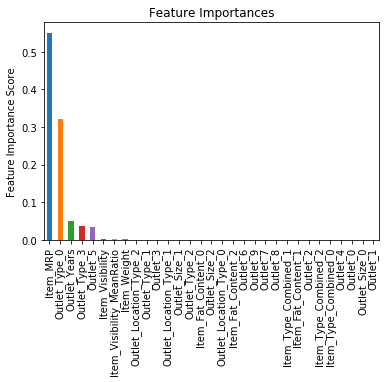

In [45]:
from sklearn.ensemble import RandomForestRegressor
algo4_1 = RandomForestRegressor(n_estimators=400,max_depth=6, min_samples_leaf=100,n_jobs=4)
predictors=['Item_MRP', 'Item_Visibility', 'Item_Weight', 'Item_Visibility_MeanRatio', 'Outlet_Years', 'Item_Fat_Content_0', 'Item_Fat_Content_1', 'Item_Fat_Content_2', 'Outlet_Location_Type_0', 'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Size_0', 'Outlet_Size_1', 'Outlet_Size_2', 'Outlet_Type_0', 'Outlet_Type_1', 'Outlet_Type_2', 'Outlet_Type_3', 'Item_Type_Combined_0', 'Item_Type_Combined_1', 'Item_Type_Combined_2', 'Outlet_0', 'Outlet_1', 'Outlet_2', 'Outlet_3', 'Outlet_4', 'Outlet_5', 'Outlet_6', 'Outlet_7', 'Outlet_8', 'Outlet_9']
target=['Item_Outlet_Sales']
ModelFit(algo4_1,predictors,target,"E:/Machine Learning Projects/Bigmart Sales Data Set/ran1.csv")
print(algo4_1.feature_importances_.reshape(-1))
print("Again this is an incremental change")
coef1 = pd.Series(algo4_1.feature_importances_.reshape(-1),predictors).sort_values(ascending=False)
coef1.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

c:\users\santanu\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\santanu\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
c:\users\santanu\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\santanu\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y w

[-1351097.70389961 -1135118.2867139  -1290297.40437162 -1254426.23257373
 -1258481.55831107 -1197691.40931677 -1077148.92099669 -1184605.35277034
 -1252827.91015908 -1163083.55123068 -1087964.54146272 -1271026.6252917
 -1268892.70539284 -1045612.78564236 -1091345.64928257 -1349307.7368357
 -1320662.884186   -1063240.94988896 -1399143.93027283 -1102149.80052365]
[1162.36728442 1065.41930089 1135.91258659 1120.01171091 1121.82064445
 1094.39088507 1037.85785202 1088.39577028 1119.29795415 1078.46351409
 1043.05538753 1127.39816626 1126.45137729 1022.55209434 1044.67490124
 1161.59706303 1149.20097641 1031.13575725 1182.85414582 1049.8332251 ]

Model Report
R square score :  60.23117993160756
RMSE (Error): 1076
CV Score : Mean - 1098 | Std - 48.03 | Min - 1023 | Max - 1183
[5.50905216e-01 1.67138553e-03 1.37421417e-03 1.05625484e-03
 5.05380752e-02 1.57261768e-04 0.00000000e+00 2.99784668e-05
 0.00000000e+00 8.76444442e-04 1.06624370e-03 0.00000000e+00
 0.00000000e+00 8.57171091e-05 3.194

c:\users\santanu\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\santanu\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Text(0, 0.5, 'Feature Importance Score')

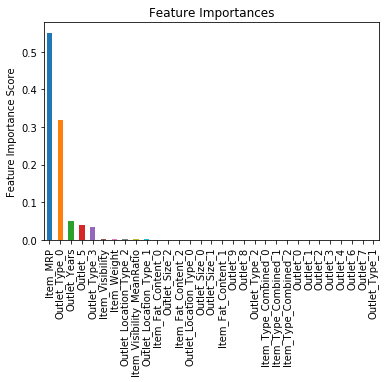

In [46]:
from sklearn.ensemble import RandomForestRegressor
algo4_1 = RandomForestRegressor(max_depth=8, min_samples_leaf=150)
predictors=['Item_MRP', 'Item_Visibility', 'Item_Weight', 'Item_Visibility_MeanRatio', 'Outlet_Years', 'Item_Fat_Content_0', 'Item_Fat_Content_1', 'Item_Fat_Content_2', 'Outlet_Location_Type_0', 'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Size_0', 'Outlet_Size_1', 'Outlet_Size_2', 'Outlet_Type_0', 'Outlet_Type_1', 'Outlet_Type_2', 'Outlet_Type_3', 'Item_Type_Combined_0', 'Item_Type_Combined_1', 'Item_Type_Combined_2', 'Outlet_0', 'Outlet_1', 'Outlet_2', 'Outlet_3', 'Outlet_4', 'Outlet_5', 'Outlet_6', 'Outlet_7', 'Outlet_8', 'Outlet_9']
target=['Item_Outlet_Sales']
ModelFit(algo4_1,predictors,target,"E:/Machine Learning Projects/Bigmart Sales Data Set/ran1.csv")
print(algo4_1.feature_importances_.reshape(-1))
print("Again this is an incremental change")
coef1 = pd.Series(algo4_1.feature_importances_.reshape(-1),predictors).sort_values(ascending=False)
coef1.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')